1.As per the data covid19 spreads starts 101 days over.
  In India -  after 69 days the counts are increasing.

  In china -  after 23 to 34 days the counts are stable not much increased, can say spreading of the virus are incontrol.
  
  In US - after 57 days the counts are keep on increasing.
  
  In Canada- after 57 days the counts increased.
                  
2. Top 3 countries affected : confirmed - New York, Hubei, Illinois.
                         Death - New York, Hubei, Quebec
3. Top 3 countries with affected counts :
US - 1198753
china - 88596
Canada - 61595

                 
        

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# dateparse = lambda x: pd.datetime.strptime(x, '%m-%d-%Y'|'%m/%d/%Y')

df=pd.read_csv(r"C:\Users\Admin1\Downloads\COVID-19 Cases.csv", parse_dates=True)

C:\Users\Admin1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df.head()

,Case_Type,People_Total_Tested_Count,Cases,Difference,Date,Combined_Key,Country,State,Admin2,iso2,iso3,FIPS,Lat,Long,Population_Count,People_Hospitalized_Cumulative_Count,Data_Source,Prep_Flow_Runtime,days
0,Confirmed,NaN,0,0,2020-02-03,Switzerland,Switzerland,NaN,NaN,CH,CHE,NaN,46.8182,8.2275,8654618.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,12 days
1,Deaths,NaN,0,0,2020-03-01,Cyprus,Cyprus,NaN,NaN,CY,CYP,NaN,35.1264,33.4299,1207361.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,39 days
2,Confirmed,NaN,23,0,2020-04-21,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,AG,ATG,NaN,17.0608,-61.7964,97928.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,90 days
3,Deaths,NaN,0,0,2020-02-11,Jamaica,Jamaica,NaN,NaN,JM,JAM,NaN,18.1096,-77.2975,2961161.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,20 days
4,Confirmed,NaN,0,0,2020-02-06,Belize,Belize,NaN,NaN,BZ,BLZ,NaN,17.1899,-88.4976,397621.0,NaN,2019 Novel Coronavirus COVID-19 (2019-nCoV) Da...,5/2/2020 11:35:41 PM,15 days


In [3]:
df.columns

Index(['Case_Type', 'People_Total_Tested_Count', 'Cases', 'Difference', 'Date',
       'Combined_Key', 'Country_Region', 'Province_State', 'Admin2', 'iso2',
       'iso3', 'FIPS', 'Lat', 'Long', 'Population_Count',
       'People_Hospitalized_Cumulative_Count', 'Data_Source',
       'Prep_Flow_Runtime'],
      dtype='object')

In [4]:
df.shape

(718080, 18)

In [9]:
df.dtypes

Case_Type                                       object
People_Total_Tested_Count                      float64
Cases                                            int64
Difference                                       int64
Date                                    datetime64[ns]
Combined_Key                                    object
Country                                         object
State                                           object
Admin2                                          object
iso2                                            object
iso3                                            object
FIPS                                           float64
Lat                                            float64
Long                                           float64
Population_Count                               float64
People_Hospitalized_Cumulative_Count           float64
Data_Source                                     object
Prep_Flow_Runtime                               object
dtype: obj

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Clean_Date'] = df.Date.apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y %H:%M'))

In [12]:
df['days']=df['Date'] - df['Date'].min()
df['days']

0        12 days
1        39 days
2        90 days
3        20 days
4        15 days
           ...  
718075    0 days
718076    0 days
718077    0 days
718078    0 days
718079    0 days
Name: days, Length: 718080, dtype: timedelta64[ns]

In [113]:
df1 = df[df['Country'].isin(['India', 'China'])]

In [147]:
df_total_cases_all_countries = df1[['Country', 'days', 'Cases']].groupby(['Country', 'days']).sum().unstack('Country')['Cases']
# df_total_cases_all_countries.sort_values(by='days',ascending=False)

(array([0.e+00, 1.e+15, 2.e+15, 3.e+15, 4.e+15, 5.e+15, 6.e+15, 7.e+15,
        8.e+15, 9.e+15]),
 <a list of 10 Text xticklabel objects>)

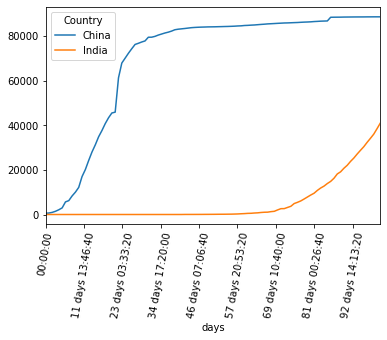

In [115]:
df_total_cases_all_countries.plot()
plt.xticks(rotation=80)

In [146]:
dfc = df[df['Country'].isin(['India', 'Canada','US',"China","Australia"])]
df_total_cases_US_china = dfc[['Country', 'days', 'Cases']].groupby(['Country', 'days']).sum().unstack('Country')['Cases']
df_total_cases_US_china.sort_values(by='days',ascending=False)
df_total_cases_US_china.tail(50)

Country,Australia,Canada,China,India,US
days,,,,,
52 days,253,197,84170,104,2913
53 days,300,251,84206,115,2988
54 days,380,417,84250,121,4385
55 days,457,475,84288,145,6160
56 days,574,656,84343,159,8994
57 days,687,800,84405,198,14291
58 days,798,945,84503,249,19693
59 days,1078,1286,84564,334,26105
60 days,1556,1476,84709,403,34150


(array([0.e+00, 1.e+15, 2.e+15, 3.e+15, 4.e+15, 5.e+15, 6.e+15, 7.e+15,
        8.e+15, 9.e+15]),
 <a list of 10 Text xticklabel objects>)

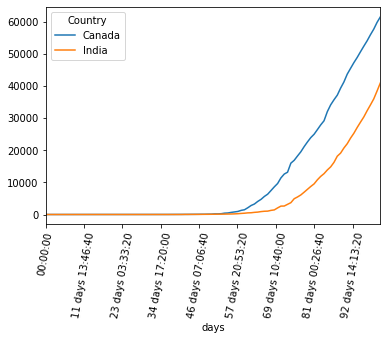

In [131]:
df_total_cases_US_china.plot()
plt.xticks(rotation=80)

In [140]:
con_dth=df.pivot_table(index=['Country'],columns=['Case_Type'],values=['Cases'],aggfunc=sum)
con_dth
# .sort_values(by=Cases.Confirmed)

Cases       
Case_Type          Confirmed Deaths
Country                            
Afghanistan            33266   1029
Albania                19435    881
Algeria                82774  10433
Andorra                23385   1043
Angola                   714     70
...                      ...    ...
West Bank and Gaza     11901     71
Western Sahara           154      0
Yemen                     48      6
Zambia                  2176     68
Zimbabwe                 745    103

[186 rows x 2 columns]

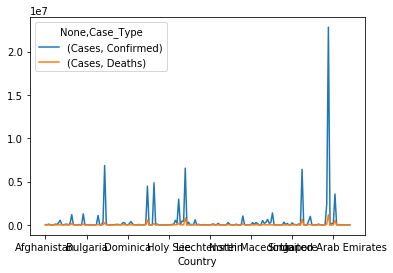

In [23]:
con_dth.plot()

In [45]:
df.rename(columns={'Province_State':'State','Country_Region':'Country'},inplace=True)

In [49]:
covid=df[["Date","State","Country","Case_Type","Cases"]]

In [22]:
covid.dropna()

,Date,State,Country,Case_Type,Cases
6,5/2/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,Deaths,0
8,4/13/2020,Bermuda,United Kingdom,Deaths,5
9,4/29/2020,New Caledonia,France,Confirmed,18
11,4/9/2020,Manitoba,Canada,Deaths,3
12,2/19/2020,Tibet,China,Deaths,0
...,...,...,...,...,...
718075,1/22/2020,Georgia,US,Confirmed,0
718076,1/22/2020,Oklahoma,US,Deaths,0
718077,1/22/2020,Wisconsin,US,Deaths,0
718078,1/22/2020,Indiana,US,Confirmed,0


In [125]:

covid.groupby('Country').Cases.sum()

Country
Afghanistan           34295
Albania               20316
Algeria               93207
Andorra               24428
Angola                  784
                      ...  
West Bank and Gaza    11972
Western Sahara          154
Yemen                    54
Zambia                 2244
Zimbabwe                848
Name: Cases, Length: 186, dtype: int64

In [51]:
covid.groupby('Case_Type').Cases.describe()

,count,mean,std,min,25%,50%,75%,max
Case_Type,,,,,,,,
Confirmed,359040.0,223.902376,3917.009576,0.0,0.0,0.0,4.0,216582.0
Deaths,359040.0,14.535935,408.006418,0.0,0.0,0.0,0.0,28710.0


In [52]:
covid.groupby('Country').Cases.mean()

Country
Afghanistan           168.112745
Albania                99.588235
Algeria               456.897059
Andorra               119.745098
Angola                  3.843137
                         ...    
West Bank and Gaza     58.686275
Western Sahara          0.754902
Yemen                   0.264706
Zambia                 11.000000
Zimbabwe                4.156863
Name: Cases, Length: 186, dtype: float64

In [105]:
# #plotting the initial horaizontal barchart 
# fig, ax = plt.subplots(figsize=(15, 8))
# ax.barh(covid['Country'], covid['Cases'])
# plt.xlabel('Number of Cases')
# plt.ylabel('Country')

In [92]:
con_cases=covid[covid['Case_Type'] == 'Confirmed'].groupby('State').max().sort_values(by='Case_Type',ascending=False)

In [103]:
con_cases

,Date,Country,Case_Type,Cases
State,,,,
Alabama,2020-05-02,US,Confirmed,1172
North Dakota,2020-05-02,US,Confirmed,572
Queensland,2020-05-02,Australia,Confirmed,1035
Quebec,2020-05-02,Canada,Confirmed,29664
Qinghai,2020-05-02,China,Confirmed,18
...,...,...,...,...
Hainan,2020-05-02,China,Confirmed,168
Guizhou,2020-05-02,China,Confirmed,147
Guangxi,2020-05-02,China,Confirmed,254


## Top 10 countries confirmed cases

In [94]:
top10_con=con_cases.sort_values(by='Cases',ascending=False)
top10_con.head(10)

,Date,Country,Case_Type,Cases
State,,,,
New York,2020-05-02,US,Confirmed,172354
Hubei,2020-05-02,China,Confirmed,68128
Illinois,2020-05-02,US,Confirmed,40227
Quebec,2020-05-02,Canada,Confirmed,29664
California,2020-05-02,US,Confirmed,24894
Ontario,2020-05-02,Canada,Confirmed,18321
Michigan,2020-05-02,US,Confirmed,17106
New Jersey,2020-05-02,US,Confirmed,15974
Pennsylvania,2020-05-02,US,Confirmed,15137


Text(0.5, 1.0, 'confirmed cases')

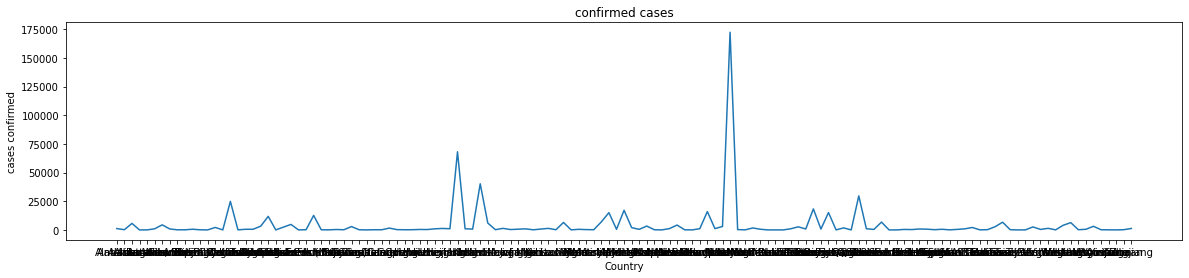

In [70]:
plt.figure(figsize=(20,4))
sns.lineplot(x=con_cases.index,y=con_cases.Cases)
plt.xlabel("Country")
plt.ylabel("cases confirmed")
plt.title("confirmed cases")

In [104]:
dth_cases=covid[covid['Case_Type'] == 'Deaths'].groupby('State').max().sort_values(by='Case_Type',ascending=False)
dth_cases

,Date,Country,Case_Type,Cases
State,,,,
Alabama,2020-05-02,US,Deaths,61
North Dakota,2020-05-02,US,Deaths,12
Queensland,2020-05-02,Australia,Deaths,6
Quebec,2020-05-02,Canada,Deaths,2136
Qinghai,2020-05-02,China,Deaths,0
...,...,...,...,...
Hainan,2020-05-02,China,Deaths,6
Guizhou,2020-05-02,China,Deaths,2
Guangxi,2020-05-02,China,Deaths,2


###  Top 10 countries Death cases

In [84]:
top10_dth=dth_cases.sort_values(by='Cases',ascending=False)
top10_dth.head(10)

,Date,Country,Case_Type,Cases
State,,,,
New York,2020-05-02,US,Deaths,18491
Hubei,2020-05-02,China,Deaths,4512
Quebec,2020-05-02,Canada,Deaths,2136
Michigan,2020-05-02,US,Deaths,1884
Illinois,2020-05-02,US,Deaths,1743
Ontario,2020-05-02,Canada,Deaths,1292
New Jersey,2020-05-02,US,Deaths,1265
California,2020-05-02,US,Deaths,1209
Massachusetts,2020-05-02,US,Deaths,923


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134],
 <a list of 135 Text xticklabel objects>)

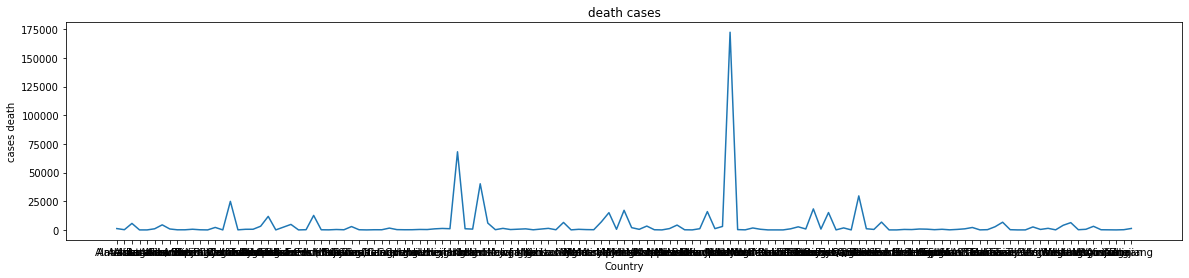

In [79]:
plt.figure(figsize=(20,4))
sns.lineplot(x=dth_cases.index,y=con_cases.Cases)
plt.xlabel("Country")
plt.ylabel("cases death")
plt.title("death cases")
# plt.xticks(rotation=40)
plt.xticks()



In [109]:
dfWW = df[df['Country'== 'US']][['days', 'Cases', 'Case_Type']].groupby('days').sum()

KeyError: False